<a href="https://colab.research.google.com/github/Soubhagyabehera/CNN/blob/master/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from keras.datasets import mnist #importing mnist datsets from keras datasets
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test) =mnist.load_data() # x_train=images, y_train=labels

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


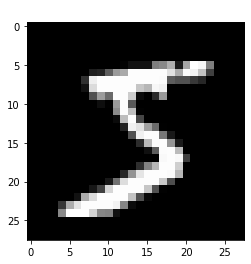

In [0]:
plt.imshow(x_train[0,:,:],cmap='gray')
plt.title(y_train[0],color='w')
plt.show()

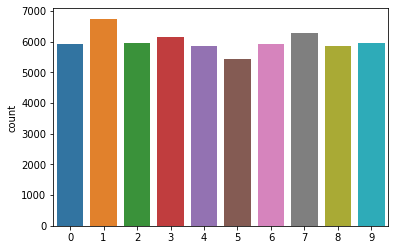

In [0]:
sns.countplot(y_train) #counting number of image per category
plt.show()

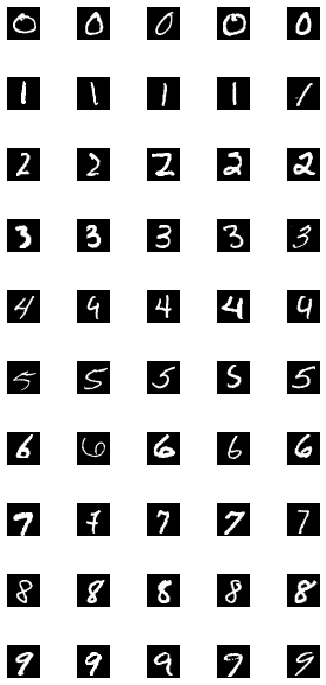

In [0]:
nrows=10
ncols=5
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(5,10))
fig.tight_layout() # to avoid overlapping of text and boxes

for i in range(ncols):
  for j in range(nrows):
    selected_image=x_train[y_train==j]
    
    image=selected_image[random.randint(0,len(selected_image)-1),:,:]
    axes[j][i].imshow(image,cmap='gray')
    axes[j][i].axis('off')

In [0]:
n_pixels=28*28
x_train= x_train.reshape(x_train.shape[0],n_pixels)
x_test= x_test.reshape(x_test.shape[0],n_pixels)

In [0]:
#scaling
x_train=x_train/255
x_test=x_test/255

In [0]:
# one hot encode y_train
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [0]:
model=Sequential()
model.add(Dense(30,input_dim = n_pixels,activation='sigmoid'))
model.add(Dense(60,activation='sigmoid'))
model.add(Dense(120,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(Adam(lr=1e-4),loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_3 (Dense)              (None, 120)               7320      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1210      
Total params: 33,940
Trainable params: 33,940
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
h=model.fit(x_train,y_train,epochs=10,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 18s 297us/step - loss: 2.1225 - acc: 0.3532 - val_loss: 1.6951 - val_acc: 0.5836
Epoch 2/10
60000/60000 [==============================] - 8s 133us/step - loss: 1.2204 - acc: 0.7038 - val_loss: 0.8702 - val_acc: 0.7912
Epoch 3/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.7063 - acc: 0.8204 - val_loss: 0.5752 - val_acc: 0.8486
Epoch 4/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.5147 - acc: 0.8632 - val_loss: 0.4542 - val_acc: 0.8755
Epoch 5/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.4304 - acc: 0.8808 - val_loss: 0.3936 - val_acc: 0.8898
Epoch 6/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.3836 - acc: 0.8929 - val_loss: 0.3599 - val_acc: 0.8960
Epoch 7/10
60000/60

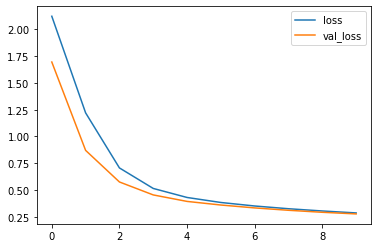

In [0]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

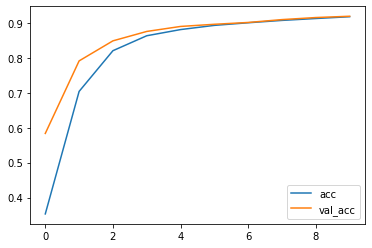

In [0]:
plt.plot(h.history['acc'],label='acc')
plt.plot(h.history['val_acc'],label='val_acc')
plt.legend()
plt.show()

In [0]:
model.save('VSSUT_mnist.h5')

In [0]:
from google.colab import files
files.download('VSSUT_mnist.h5')

MessageError: ignored